<a href="https://colab.research.google.com/github/sraghav42/machine_learning/blob/master/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
vector_a=[1.,2.,3.]
vector_b=[4.,5.,6.]
vector_c=[]

print(vector_a+vector_b)

for i in range(len(vector_a)):
  vector_c.append(vector_a[i]*vector_b[i])

print(sum(vector_c))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
32.0


No handles with labels found to put in legend.


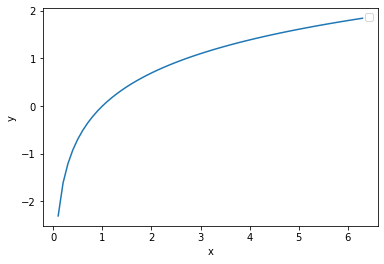

In [0]:
import matplotlib.pyplot as plt
import math
 
x = [0.1*i for i in range(1,64)]
y = [0.1*i for i in range(0,-64,-1)]
sin = [math.sin(i) for i in x]
cos = [math.cos(i) for i in x]
ppar = [i**2 for i in x]
npar = [i**2 for i in y]
ex = [math.exp(i) for i in x]
log = [math.log(i) for i in x]
 
#plt.plot(x, sin, label='sin(x)', color='blue', linewidth=2.5)
#plt.plot(x, cos, label='cos(x)', color='red', linewidth=0.5)
#plt.plot(x,ppar)
#plt.plot(y,npar)
#plt.plot(x,ex)
plt.plot(x,log)
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()

Estimated minimum -0.25, -0.06
Derivative (gradient) 0.00


Text(0.5, 1.0, 'Parabola')

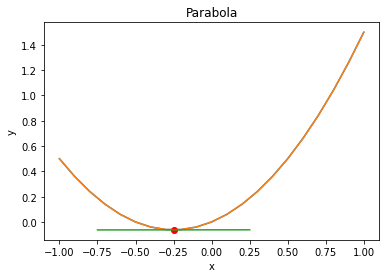

In [5]:
import matplotlib.pyplot as plt

def parabola(x):
    return x**2 + x/2.0
 
def derivative(x):
  return 2*x + 0.5
 
x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parabola')

x_k = 0.0
 
# Experiment with these two hyperparameters
learning_rate = 0.1
epochs = 30
 
for i in range(epochs):
    gradient = derivative(x_k)
    x_k = x_k - learning_rate*gradient
 
print('Estimated minimum %0.2f, %0.2f' % (x_k, parabola(x_k)))
print('Derivative (gradient) %0.2f' % gradient)
 
x = [i * 0.1 for i in range(-10, 11)]
y = [parabola(xi) for xi in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_k, parabola(x_k), 'ro')
line_x = [x_k - 0.5, x_k + 0.5]
line_y = [gradient*(xi-x_k)+parabola(x_k) for xi in line_x]
plt.plot(line_x, line_y)
plt.title('Parabola')

# Training A Model

Imporing dependencies and defining sigmoid function

***sklearn*** is an ML library containing multiple datasets

In [0]:
import math
import matplotlib.pyplot as plt
from sklearn import datasets

iris=datasets.load_iris()

#defining the sigmoid function
def sigmoid(z):
  return (1/(1+(math.e**(-z))))

#defining prediction function
def predict(sample):
  result  = 0.0
  for i in range(len(sample)):
    result = result + weights[i] * sample[i]
    
  result = result + bias
  return (sigmoid(result))

Defining the loss function and the backpropogation algorithm for 1 epoch

In [0]:
#defining loss function
def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

#backpropogation algo for 1 epoch
num_features = iris.data.shape[1]
 
def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0] * num_features
  db = 0.0
 
  global bias, weights
 
  m = len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample, predicted)
    
    # dz is the derivative of the loss function
    dz = predicted - y_sample
    
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

Training the model

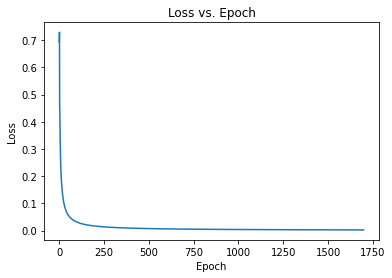

In [15]:
#training the model with multiple epoch's
# Model will "learn" values for the weights and biases
 
weights = [0.0] * num_features
bias = 0.0
 
# Choose values for learning rate and number of epochs
# These are hyper parameter
learning_rate = 0.2
epochs = 1700
 
x_train_samples = iris.data
y_train_samples = [1 if y == 0 else 0 for y in iris.target]
 
loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)
 
plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

Making A predcition

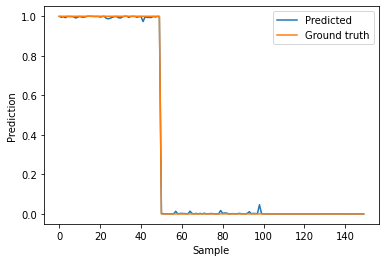

Accuracy: 100.00 %


In [16]:
#making preditcions
predictions = []
 
m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0
 
plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()
 
print('Accuracy: %.2f %%' % (100 * correct/m))